In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from __future__ import division
import pandas as pd
import requests 
from dotenv import load_dotenv
import os
import json

In [2]:
load_dotenv()

True

In [3]:
quandl_api = os.getenv("quandl_api")

In [4]:
type(quandl_api)

str

In [5]:
import quandl
y_tif_equity = quandl.get("WIKI/TIF",start_date="2017-01-01",end_date="2018-01-01")["Close"]
y_tif_equity

Date
2017-01-03     77.79
2017-01-04     79.26
2017-01-05     76.81
2017-01-06     77.16
2017-01-09     76.84
               ...  
2017-12-22    102.84
2017-12-26    105.20
2017-12-27    105.24
2017-12-28    104.22
2017-12-29    103.95
Name: Close, Length: 250, dtype: float64

In [6]:
gold = quandl.get('LBMA/GOLD', start_date="2017-01-01",end_date="2018-01-01")
gold = gold.rename(columns={'USD (PM)': 'gold'})
gold = gold["gold"]


In [7]:
silver = quandl.get('LBMA/SILVER', start_date="2017-01-01",end_date="2018-01-01")
silver = silver.rename(columns={'USD': 'silver'})["silver"]


In [8]:
x_closing_prices_df = pd.DataFrame()
x_closing_prices_df = pd.concat([gold, silver], axis=1)


In [9]:
new_dataframe = x_closing_prices_df.merge(y_tif_equity,left_index=True, right_index=True)

In [10]:
new_dataframe.rename(columns={"gold":"Gold","silver":"Silver","Close":"TIF Close"},inplace=True)

In [11]:
new_dataframe.dropna(inplace=True)

In [12]:
y = new_dataframe["TIF Close"].values
x = new_dataframe.drop(columns="TIF Close").values

In [13]:
from sklearn.model_selection import train_test_split
#splitting the data to train the model and using 30% of the data for training and 70% for actual data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3,random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred = model.predict(x_test)

In [16]:
model.predict([[1000,12]])

array([81.15663332])

In [17]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test,y_pred)

In [18]:
r2_score

0.38535745862565896

Text(0, 0.5, 'Predicted Data')

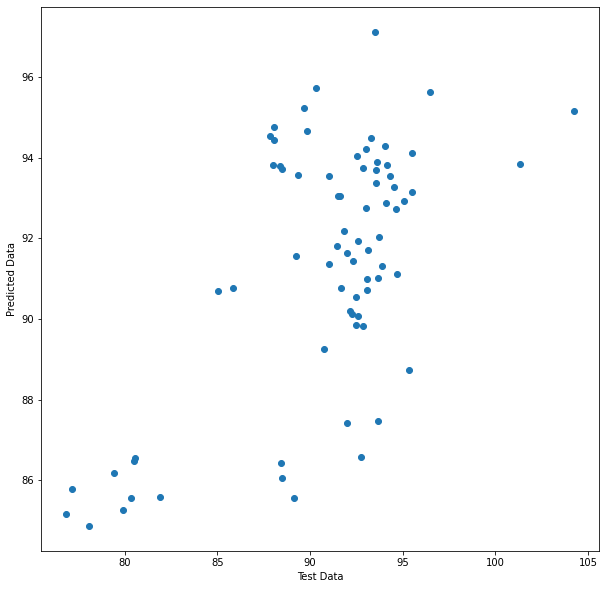

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred)
plt.xlabel("Test Data")
plt.ylabel("Predicted Data")